In [4]:
#https://www.youtube.com/watch?v=wQ8BIBpya2k&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=1&ab_channel=sentdex

# Hand Written recognition
import tensorflow as tf

#import the dataset of 28x28 hand-written numbers from 0-9
mnist = tf.keras.datasets.mnist
#unpack mnist dataset to test and train sets
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


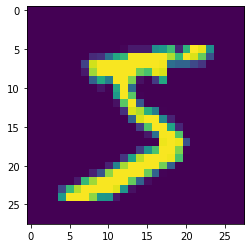

In [7]:
import matplotlib.pyplot as plt
#display this first image
plt.imshow(X_train[0])
plt.show()

In [ ]:
#remove th color and make it black and white
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [8]:
#display the image in form of tensor (from 0 to 255 pixel data)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [13]:
#normalizing the from 0 to 1 for easy learning
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
print(X_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
#Build Model
model=tf.keras.Sequential()

#Input Layer
model.add(tf.keras.layers.Flatten()) #Our current data is in multi-dim (28 x 28) o flatten it to a layer

#hidden Layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 neurons and activation function as relu
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

#Output Layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
 #only 10 since the o/p will be numbers from 0 to 9 and action function is softmax since probablity

#parameters to train the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#train the model
model.fit(X_train, y_train, epochs = 3)


Epoch 1/3
1875/1875 [==============================] - 2s 891us/step - loss: 0.2640 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 2s 962us/step - loss: 0.1108 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 2s 841us/step - loss: 0.0736 - accuracy: 0.9768


In [19]:
val_loss, val_accuracy = model.evaluate(X_test,y_test)
print("loss:",val_loss)
print("accuracy:",val_accuracy)

313/313 [==============================] - 0s 649us/step - loss: 0.0939 - accuracy: 0.9696
loss: 0.09394343197345734
accuracy: 0.9696000218391418


In [20]:
#save model and predict
model.save('epic_num_reader.model')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [22]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [23]:
predictions = new_model.predict([X_test])

In [24]:
print(predictions)

[[5.6531300e-09 4.0219820e-08 2.1628905e-05 ... 9.9996758e-01
  1.6944865e-08 1.5654688e-07]
 [3.5190936e-08 8.2693361e-03 9.9172056e-01 ... 1.7075912e-08
  1.7216119e-07 8.9469664e-12]
 [1.3496756e-07 9.9987912e-01 1.7507593e-05 ... 3.5049783e-05
  5.2335457e-05 3.6128668e-07]
 ...
 [3.1270171e-09 6.1572806e-08 8.0117400e-07 ... 4.6755758e-06
  8.1208163e-06 2.7132992e-05]
 [3.6585986e-06 1.2184678e-07 3.7360238e-08 ... 3.7813805e-07
  1.4805976e-04 2.1530425e-08]
 [2.7939841e-06 6.7694037e-09 2.3049051e-07 ... 5.1185098e-11
  1.3953039e-07 8.6036717e-10]]


In [26]:
import numpy as np

print(np.argmax(predictions[0]))

7


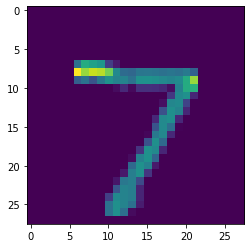

In [27]:
plt.imshow(X_test[0])